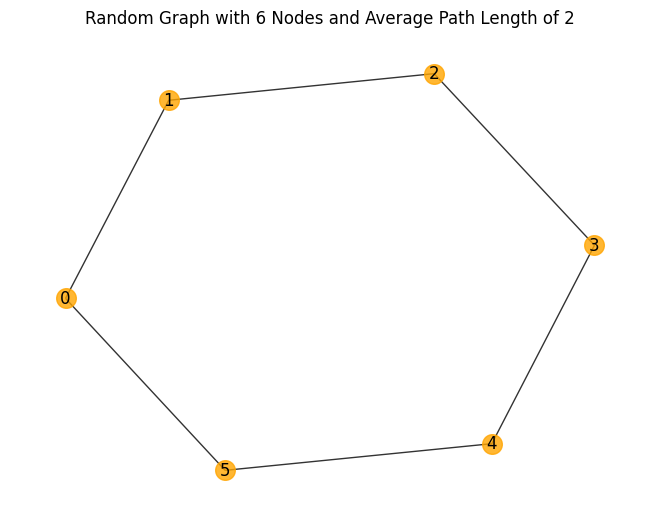

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import random
num_nodes = 6
avg_path_len = 2
def watts_strogatz_graph(n, k, p, seed=None):
    """Return a Watts-Strogatz small-world graph.


    Parameters
    ----------
    n : int
        The number of nodes
    k : int
        Each node is connected to k nearest neighbors in ring topology
    p : float
        The probability of rewiring each edge
    seed : int, optional
        Seed for random number generator (default=None)

    See Also
    --------
    newman_watts_strogatz_graph()
    connected_watts_strogatz_graph()

    Notes
    -----
    First create a ring over n nodes.  Then each node in the ring is
    connected with its k nearest neighbors (k-1 neighbors if k is odd).
    Then shortcuts are created by replacing some edges as follows:
    for each edge u-v in the underlying "n-ring with k nearest neighbors"
    with probability p replace it with a new edge u-w with uniformly
    random choice of existing node w.

    In contrast with newman_watts_strogatz_graph(), the random
    rewiring does not increase the number of edges. The rewired graph
    is not guaranteed to be connected as in  connected_watts_strogatz_graph().

    References
    ----------
    .. [1] Duncan J. Watts and Steven H. Strogatz,
       Collective dynamics of small-world networks,
       Nature, 393, pp. 440--442, 1998.
    """
    if k>=n:
        raise nx.NetworkXError("k>=n, choose smaller k or larger n")
    if seed is not None:
        random.seed(seed)

    G = nx.Graph()
    G.name="watts_strogatz_graph(%s,%s,%s)"%(n,k,p)
    nodes = list(range(n)) # nodes are labeled 0 to n-1
    # connect each node to k/2 neighbors
    for j in range(1, k // 2+1):
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
    # rewire edges from each node
    # loop over all nodes in order (label) and neighbors in order (distance)
    # no self loops or multiple edges allowed
    for j in range(1, k // 2+1): # outer loop is neighbors
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        # inner loop in node order
        for u,v in zip(nodes,targets):
            if random.random() < p:
                w = random.choice(nodes)
                # Enforce no self-loops or multiple edges
                while w == u or G.has_edge(u, w):
                    w = random.choice(nodes)
                    if G.degree(u) >= n-1:
                        break # skip this rewiring
                else:
                    G.remove_edge(u,v)
                    G.add_edge(u,w)
    return G
# Generate a random graph with the given number of nodes and average path length
graph = watts_strogatz_graph(num_nodes, k=avg_path_len, p=0.1)

# Draw the graph
pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos, node_size=200, alpha=0.8, node_color='orange')

# Label the nodes with their IDs
labels = {node: str(node) for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos=pos, labels=labels, font_size=12)

plt.axis('off')
plt.title('Random Graph with %d Nodes and Average Path Length of %d' % (num_nodes, avg_path_len))
plt.show()
